# Exercise 9

## Mashable news stories analysis

Predicting if a news story is going to be popular


In [1]:
import pandas as pd
import numpy as np

url = 'https://raw.githubusercontent.com/albahnsen/PracticalMachineLearningClass/master/datasets/mashable.csv'
train_df = pd.read_csv(url)
train_df.head()

,Unnamed: 0,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,Popular
0,0,http://mashable.com/2014/12/10/cia-torture-rep...,28.0,9.0,188.0,0.732620,1.0,0.844262,5.0,1.0,...,0.200000,0.80,-0.487500,-0.60,-0.250000,0.9,0.8,0.4,0.8,1
1,1,http://mashable.com/2013/10/18/bitlock-kicksta...,447.0,7.0,297.0,0.653199,1.0,0.815789,9.0,4.0,...,0.160000,0.50,-0.135340,-0.40,-0.050000,0.1,-0.1,0.4,0.1,0
2,2,http://mashable.com/2013/07/24/google-glass-po...,533.0,11.0,181.0,0.660377,1.0,0.775701,4.0,3.0,...,0.136364,1.00,0.000000,0.00,0.000000,0.3,1.0,0.2,1.0,0
3,3,http://mashable.com/2013/11/21/these-are-the-m...,413.0,12.0,781.0,0.497409,1.0,0.677350,10.0,3.0,...,0.100000,1.00,-0.195701,-0.40,-0.071429,0.0,0.0,0.5,0.0,0
4,4,http://mashable.com/2014/02/11/parking-ticket-...,331.0,8.0,177.0,0.685714,1.0,0.830357,3.0,2.0,...,0.100000,0.55,-0.175000,-0.25,-0.100000,0.0,0.0,0.5,0.0,0


In [2]:
train_df.shape

(6000, 62)

In [3]:
X = train_df.drop(['url', 'Popular'], axis=1)
y = train_df['Popular']

In [4]:
y.mean()

0.5

In [5]:
# train/test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

#publicar o no publicar
#medir el potencial impacto
#cuanto cobro a los que ponen publicidad


# Exercise 9.1

Estimate a Decision Tree Classifier and a Logistic Regresion

Evaluate using the following metrics:
* Accuracy
* F1-Score

In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
models = {'lo': LogisticRegression(),
          'dt': DecisionTreeClassifier()}

In [48]:
for model in models.keys():
    models[model].fit(X_train, y_train)

C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [49]:
y_pred = pd.DataFrame(index=y_test.index, columns=models.keys())
for model in models.keys():
    y_pred[model] = models[model].predict(X_test)

In [50]:
y_pred

,lo,dt
1782,0,0
3917,1,0
221,0,1
2135,0,0
5224,0,0
1168,0,0
879,0,0
156,0,1
1657,1,1
323,0,0


In [51]:
from sklearn.metrics import mean_squared_error

for model in models.keys():
    print(model,np.sqrt(mean_squared_error(y_pred[model], y_test)))

lo 0.6034413096079967
dt 0.6493975452041467


In [52]:
np.sqrt(mean_squared_error(y_pred.mean(axis=1), y_test))

0.5456439065244592

In [53]:
from sklearn import metrics
from sklearn.metrics import f1_score
for model in models.keys():
    print(model, metrics.f1_score(y_pred[model], y_test))

lo 0.6183165696135521
dt 0.5754956786985257


# Exercise 9.2

Estimate 300 bagged samples

Estimate the following set of classifiers:

* 100 Decision Trees where max_depth=None -- 100 arboles
* 100 Decision Trees where max_depth=2 -- 100 arboles
* 100 Logistic Regressions -- reg log

In [14]:
from sklearn.ensemble import BaggingRegressor
bagreg = BaggingRegressor(DecisionTreeClassifier(max_depth=None), n_estimators=100, 
                          bootstrap=True, oob_score=True, random_state=1)
bagreg1 = BaggingRegressor(DecisionTreeClassifier(max_depth=2), n_estimators=100, 
                          bootstrap=True, oob_score=True, random_state=1)
bagreg2 = BaggingRegressor(LogisticRegression(penalty='l1', solver='liblinear'), n_estimators=100, 
                          bootstrap=True, oob_score=True, random_state=1)

In [15]:
bagreg.fit(X_train, y_train)
y_pred = bagreg.predict(X_test)
y_pred

bagreg1.fit(X_train, y_train)
y_pred1 = bagreg1.predict(X_test)
y_pred1

bagreg2.fit(X_train, y_train)
y_pred2 = bagreg2.predict(X_test)
y_pred2

array([1.  , 1.  , 0.96, ..., 0.82, 1.  , 1.  ])

# Exercise 9.3

Ensemble using majority voting

Evaluate using the following metrics:
* Accuracy
* F1-Score

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [17]:
n_estimators = 100
# set a seed for reproducibility
np.random.seed(123)

n_samples = X_train.shape[0]

# create bootstrap samples (will be used to select rows from the DataFrame)
samples = [np.random.choice(a=n_samples, size=n_samples, replace=True) for _ in range(n_estimators)]

In [18]:
from sklearn.tree import DecisionTreeClassifier

np.random.seed(123) 
seeds = np.random.randint(1, 10000, size=n_estimators)

trees = {}
for i in range(n_estimators):
    trees[i] = DecisionTreeClassifier(max_features="sqrt", max_depth=None, random_state=seeds[i])
    trees[i].fit(X_train.iloc[samples[i]], y_train.iloc[samples[i]])

In [19]:
y_pred_df = pd.DataFrame(index=X_test.index, columns=list(range(n_estimators)))
for i in range(n_estimators):
    y_pred_df.iloc[:, i] = trees[i].predict(X_test)

y_pred_df.head

<bound method NDFrame.head of       0   1   2   3   4   5   6   7   8   9  ...  90  91  92  93  94  95  96  \
1782   0   0   0   1   1   1   1   1   0   1 ...   1   0   1   1   1   1   1   
3917   0   0   0   0   0   0   0   1   0   1 ...   1   0   0   0   1   0   1   
221    0   1   1   1   0   1   0   1   0   1 ...   0   0   1   1   1   0   0   
2135   0   0   0   0   0   1   0   1   0   0 ...   0   0   0   0   0   0   0   
5224   1   0   0   1   0   0   0   0   0   0 ...   0   0   0   0   0   0   1   
1168   0   0   1   0   0   1   0   0   0   1 ...   1   0   1   0   1   1   0   
879    0   0   1   0   1   0   1   0   0   1 ...   0   0   1   0   0   0   0   
156    0   1   0   0   0   0   0   0   0   0 ...   0   0   0   1   1   0   0   
1657   1   0   0   1   1   0   1   1   1   1 ...   1   0   1   0   0   0   1   
323    1   0   1   0   1   0   0   1   0   0 ...   1   1   1   1   0   0   0   
5302   0   1   0   1   0   0   0   1   1   0 ...   0   1   1   1   0   1   0   
2611   0  

In [21]:
y_pred = (y_pred_df.sum(axis=1) >= (n_estimators / 2)).astype(np.int)

from sklearn import metrics
metrics.f1_score(y_pred, y_test)

0.6571146245059288

In [22]:
metrics.accuracy_score(y_pred, y_test)

0.6494949494949495

In [23]:
from sklearn.ensemble import BaggingClassifier
clf = BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100, bootstrap=True,
                        random_state=42, n_jobs=-1, oob_score=True)

In [24]:
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
metrics.f1_score(y_pred, y_test), metrics.accuracy_score(y_pred, y_test)

(0.6445783132530121, 0.6424242424242425)

# Exercise 9.4

Estimate te probability as %models that predict positive

Modify the probability threshold and select the one that maximizes the F1-Score #default es 0.5

In [42]:
y.value_counts().to_frame('count').assign(percentage = lambda x: x/x.sum())

,count,percentage
1,3000,0.5
0,3000,0.5


In [43]:
y_pred_df.sum(axis=1)[:10]

1782    58
3917    37
221     45
2135    18
5224    32
1168    37
879     28
156     18
1657    61
323     33
dtype: int64

In [44]:
res=[]
for i in range(y_pred_df.shape[1]):
    print(metrics.accuracy_score(y_pred_df.iloc[:,i], y_test))

0.5545454545454546
0.5398989898989899
0.5772727272727273
0.5510101010101011
0.5661616161616162
0.5368686868686868
0.548989898989899
0.555050505050505
0.5484848484848485
0.544949494949495
0.5595959595959596
0.5626262626262626
0.554040404040404
0.5651515151515152
0.5732323232323232
0.55
0.5661616161616162
0.5348484848484848
0.5494949494949495
0.546969696969697
0.5424242424242425
0.5595959595959596
0.5636363636363636
0.5732323232323232
0.5434343434343434
0.5717171717171717
0.55
0.5575757575757576
0.5555555555555556
0.5590909090909091
0.5388888888888889
0.5454545454545454
0.5707070707070707
0.5429292929292929
0.5494949494949495
0.5525252525252525
0.5626262626262626
0.5378787878787878
0.5525252525252525
0.5843434343434344
0.5641414141414142
0.5565656565656566
0.5414141414141415
0.5545454545454546
0.5747474747474748
0.555050505050505
0.545959595959596
0.5474747474747474
0.5494949494949495
0.5737373737373738
0.5666666666666667
0.5525252525252525
0.5742424242424242
0.5555555555555556
0.5691919

In [45]:
res1=[]
for i in range(y_pred_df.shape[1]):
    print(metrics.f1_score(y_pred_df.iloc[:,i], y_test))

0.5458290422245108
0.5438157235853781
0.5821268097853219
0.5539387857501256
0.5732737208147044
0.5361659079413252
0.5464702894870493
0.5645081562036579
0.5466531440162272
0.5460957178841309
0.56312625250501
0.5661322645290581
0.5673689367956884
0.5649317837291561
0.5777111444277861
0.5456399796022438
0.5583547557840617
0.5350832912670369
0.5481256332320162
0.5458227848101266
0.5419615773508594
0.5587044534412956
0.5550978372811536
0.5818901533894113
0.5401831129196338
0.5677879714576962
0.5423728813559322
0.5548780487804877
0.5604395604395604
0.5676077265973255
0.5276771857216761
0.5472837022132796
0.5728643216080401
0.5486284289276808
0.5526579739217653
0.5447070914696814
0.5652610441767068
0.5329249617151608
0.5488798370672098
0.5772984078068824
0.5708602685231227
0.5565656565656566
0.536261491317671
0.5585585585585585
0.580259222333001
0.5557236510337872
0.5415604283528812
0.5456389452332657
0.5476673427991886
0.5693877551020409
0.5622448979591836
0.5547738693467337
0.57229832572298

# Exercise 9.5

Ensemble using weighted voting using the oob_error

Evaluate using the following metrics:
* Accuracy
* F1-Score

In [25]:
clf = BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100, bootstrap=True,
                        random_state=42, n_jobs=-1, oob_score=True)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
metrics.f1_score(y_pred, y_test), metrics.accuracy_score(y_pred, y_test)

(0.6445783132530121, 0.6424242424242425)

In [26]:
errors = np.zeros(clf.n_estimators)
y_pred_all_ = np.zeros((X_test.shape[0], clf.n_estimators))

for i in range(clf.n_estimators):
    oob_sample = ~clf.estimators_samples_[i]
    y_pred_ = clf.estimators_[i].predict(X_train.values[oob_sample])
    errors[i] = metrics.accuracy_score(y_pred_, y_train.values[oob_sample])
    y_pred_all_[:, i] = clf.estimators_[i].predict(X_test)
    
alpha = (1 - errors) / (1 - errors).sum()
y_pred = (np.sum(y_pred_all_ * alpha, axis=1) >= 0.5).astype(np.int)

In [27]:
metrics.f1_score(y_pred, y_test), metrics.accuracy_score(y_pred, y_test)

(0.6511397423191279, 0.6444444444444445)

# Exercise 9.6

Estimate te probability of the weighted voting

Modify the probability threshold and select the one that maximizes the F1-Score

In [28]:
samples_oob = []
for sample in samples:
    samples_oob.append(sorted(set(range(n_samples)) - set(sample)))

In [29]:
errors = np.zeros(n_estimators)

for i in range(n_estimators):
    y_pred_ = trees[i].predict(X_train.iloc[samples_oob[i]])
    errors[i] = 1 - metrics.accuracy_score(y_train.iloc[samples_oob[i]], y_pred_)

Text(0.5, 1.0, 'OOB error of each tree')

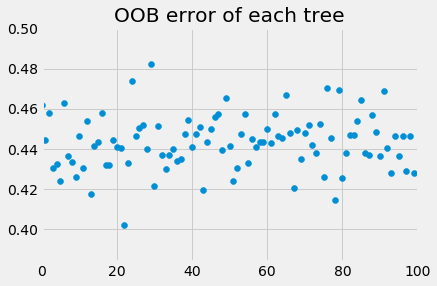

In [30]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

plt.scatter(range(n_estimators), errors)
plt.xlim([0, n_estimators])
plt.title('OOB error of each tree')

In [31]:
alpha = (1 - errors) / (1 - errors).sum()

In [32]:
weighted_sum_1 = ((y_pred_df) * alpha).sum(axis=1)

In [33]:
weighted_sum_1.head(20)

1782    0.582289
3917    0.370041
221     0.451645
2135    0.181178
5224    0.320452
1168    0.370798
879     0.279333
156     0.179389
1657    0.609606
323     0.331077
5302    0.449422
2611    0.299635
811     0.448833
393     0.630987
3593    0.460015
2638    0.489268
2187    0.657659
5351    0.479262
319     0.109387
167     0.670352
dtype: float64

In [34]:
y_pred = (weighted_sum_1 >= 0.5).astype(np.int)

metrics.f1_score(y_pred, y_test), metrics.accuracy_score(y_pred, y_test)

(0.6530408773678963, 0.6484848484848484)

# Exercise 9.7

Estimate a logistic regression using as input the estimated classifiers

Modify the probability threshold such that maximizes the F1-Score

In [35]:
X_train_2 = pd.DataFrame(index=X_train.index, columns=list(range(n_estimators))) #cada modelo hace overfitin

for i in range(n_estimators):
    X_train_2[i] = trees[i].predict(X_train)

In [36]:
from sklearn.linear_model import LogisticRegressionCV
lr = LogisticRegressionCV(cv = 5 )
lr.fit(X_train_2, y_train)

LogisticRegressionCV(Cs=10, class_weight=None, cv=5, dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=100,
           multi_class='warn', n_jobs=None, penalty='l2',
           random_state=None, refit=True, scoring=None, solver='lbfgs',
           tol=0.0001, verbose=0)

In [37]:
lr.coef_

array([[0.03202204, 0.03322447, 0.03259434, 0.03336937, 0.03277787,
        0.03334688, 0.0327037 , 0.03345375, 0.03323121, 0.03360643,
        0.03228301, 0.03347795, 0.03227008, 0.03319649, 0.03247659,
        0.03292581, 0.03261363, 0.03309421, 0.03325745, 0.03258211,
        0.0327861 , 0.03303638, 0.03452604, 0.03278867, 0.03192832,
        0.03286407, 0.03247466, 0.032441  , 0.0326296 , 0.03189279,
        0.03366277, 0.03293174, 0.03289413, 0.03344521, 0.03276032,
        0.03304766, 0.03269976, 0.03355352, 0.03256685, 0.03225982,
        0.03290834, 0.0326421 , 0.03290538, 0.03375285, 0.03286841,
        0.0327464 , 0.03240748, 0.03245771, 0.0329707 , 0.03169045,
        0.03285974, 0.03339411, 0.0330419 , 0.03234921, 0.03217838,
        0.03304465, 0.03289963, 0.03299245, 0.03323476, 0.03317454,
        0.03286333, 0.03301111, 0.03214849, 0.0328216 , 0.03282581,
        0.03218907, 0.03253907, 0.03382013, 0.03260814, 0.03363583,
        0.03270115, 0.03319634, 0.03317548, 0.03

In [38]:
y_pred = lr.predict(y_pred_df)

In [39]:
metrics.f1_score(y_pred, y_test), metrics.accuracy_score(y_pred, y_test)

(0.6495983935742972, 0.6474747474747474)

In [40]:
y_pred_all_ = np.zeros((X_test.shape[0], clf.n_estimators))
X_train_3 = np.zeros((X_train.shape[0], clf.n_estimators))

for i in range(clf.n_estimators):

    X_train_3[:, i] = clf.estimators_[i].predict(X_train)
    y_pred_all_[:, i] = clf.estimators_[i].predict(X_test)
    
lr = LogisticRegressionCV(cv=5)
lr.fit(X_train_3, y_train)

y_pred = lr.predict(y_pred_all_)
metrics.f1_score(y_pred, y_test), metrics.accuracy_score(y_pred, y_test)

(0.6439317953861585, 0.6414141414141414)

In [41]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
metrics.f1_score(y_pred, y_test), metrics.accuracy_score(y_pred, y_test)

(0.5773930753564155, 0.5808080808080808)